# Results and Figures

# Coupled Morse Hamiltonian

In this notebook we show the results for the integration of the time-dependent Schrödinger equation

$$
i \hbar \frac{d \psi(x,y,t)}{dt} = \hat{H} \psi(x,y,t)
$$

for the 1D Harmonic Oscillator system. That is, the Hamiltonian $\hat{H}$ is:

$$
\hat{H}(x) = \frac{1}{2}G_{11}p_x^2 + \frac{1}{2}G_{11}p_y^2  +  G_{12}p_x p_y + U_{D_e,a,x_0}(x) + U_{D_e,a,x_0}(y)
$$

where

$$
U_{D_e,a,x_0}(x) = D_e (e^{-2a(x-x_0)} - 2e^{-a(x-x_0)})
$$

In this case we choose $G_{12} = \frac{\cos(\alpha)}{M_O}$, $G_{11} = \frac{M_H + M_O}{M_HM_O}$, $D_e = 0.20276 au$, $a=1.1484 au$, $x_0=0$, where $M_H$ and $M_O$ are the Hydrogen and Oxygen masses respectively and $\alpha$ is the bending angle. All units are atomic units so that $\hbar=1$. 


In [1]:
import numpy as np
import pandas as pd
from plotly.graph_objs import graph_objs as go
from plotly.subplots import make_subplots
from plotly.offline import iplot
import matplotlib.pyplot as plt

## Energy spectrum

In [2]:
De = 8.84e-12*22937126583.579*2
print(-De)
with open('results/spectrum/MorseE02_spectrum.npy', 'rb') as f: 
    I_mod02 = np.load(f, allow_pickle=True) 

with open('results/spectrum/MorseE13_spectrum.npy', 'rb') as f: 
    I_mod13 = np.load(f, allow_pickle=True) 

with open('results/spectrum/MorseE20_spectrum.npy', 'rb') as f: 
    I_mod20 = np.load(f, allow_pickle=True) 

with open('results/spectrum/MorseE29_spectrum.npy', 'rb') as f: 
    I_mod29 = np.load(f, allow_pickle=True) 

-0.4055283979976767


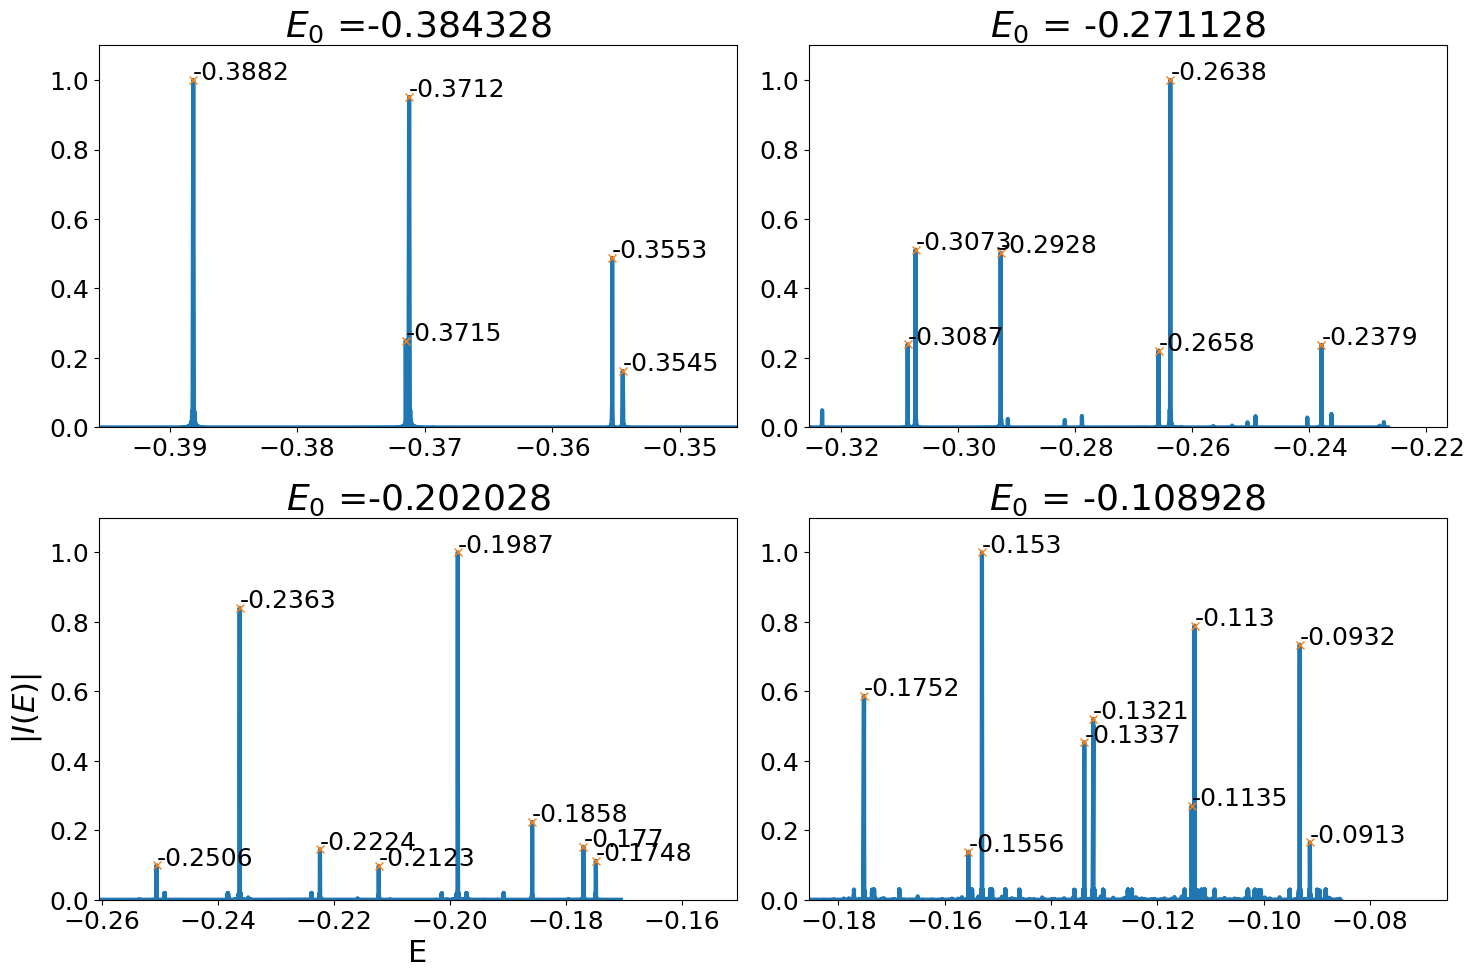

In [3]:
from scipy.signal import find_peaks

peaks, _ = find_peaks(I_mod02, height=0.05)

Emin=0.0
Emax=0.1
dE=0.000001

E = np.arange(Emin, Emax, dE) - De

# E=0.02
fig, ((ax1, ax2),(ax3,ax4)) = plt.subplots(2,2, figsize=(15,10))
ax1.plot(E,I_mod02, linewidth=3)
ax1.plot(E[peaks], I_mod02[peaks], "x")
ax1.set_title("$E_0$ ={:.6f}".format(0.0212 - De), fontsize=26)
ax1.set_xlim(0.01-De,0.06-De)
ax1.set_ylim(0, 1.1)
ax1.tick_params(axis='both', which='major', labelsize=12)
for i in range(peaks.shape[0]):
    ax1.text(E[peaks][i], I_mod02[peaks][i],
             round(E[peaks][i],4), fontsize=18)


# E=0.13
peaks, _ = find_peaks(I_mod13, height=0.06)
Emin=0.07
Emax=0.24
dE=0.000001
E = np.arange(Emin, Emax, dE) - De
idx = np.arange(len(E))[E<0.179-De]
ax2.plot(E[idx],I_mod13[idx], linewidth=3)
ax2.plot(E[peaks], I_mod13[peaks], "x")
ax2.set_title("$E_0$ = {:.6f}".format(0.1344-De), fontsize=26)
ax2.set_xlim(0.08-De,0.189-De)
ax2.set_ylim(0, 1.1)

for i in range(peaks.shape[0]):
    if E[peaks][i]<0.175-De:
        ax2.text(E[peaks][i], I_mod13[peaks][i],
             round(E[peaks][i],4), fontsize=18)
        
# E=0.20
peaks, _ = find_peaks(I_mod20, height=0.05)
Emin=0.14
Emax=0.29
dE=0.000001
E = np.arange(Emin, Emax, dE) - De
idx = np.arange(len(E))[E<0.235-De]
ax3.plot(E[idx],I_mod20[idx], linewidth=3)
ax3.plot(E[peaks][:-1], I_mod20[peaks][:-1], "x")
ax3.set_title("$E_0$ ={:.6f}".format(0.2035 - De), fontsize=26)
ax3.set_xlim(0.145-De,0.255-De)
ax3.set_ylim(0, 1.1)

for i in range(peaks.shape[0]):
    if E[peaks][i]<0.235-De:
        ax3.text(E[peaks][i], I_mod20[peaks][i],
             round(E[peaks][i],4), fontsize=18)

# E=0.29
peaks, _ = find_peaks(I_mod29, height=0.12)
Emin=0.15
Emax=0.35
dE=0.000001
E = np.arange(Emin, Emax, dE) - De
idx = np.arange(len(E))[E<0.32-De]
ax4.plot(E[idx],I_mod29[idx], linewidth=3)
ax4.plot(E[peaks][:-2], I_mod29[peaks][:-2], "x")
ax4.set_title("$E_0$ = {:.6f}".format(0.2966 - De), fontsize=26)
ax3.set_xlabel("E", fontsize=22)
ax3.set_ylabel(r"$|I(E)|$", fontsize=22)
ax4.set_xlim(0.22-De,0.34-De)
ax4.set_ylim(0, 1.1)

ax4.tick_params(axis='both', which='major',labelsize=18)
ax3.tick_params(axis='both', which='major',labelsize=18)
ax2.tick_params(axis='both', which='major',labelsize=18)
ax1.tick_params(axis='both', which='major',labelsize=18)
for i in range(peaks.shape[0]):
    if E[peaks][i]<0.32-De:
        ax4.text(E[peaks][i], I_mod29[peaks][i],
             round(E[peaks][i],4), fontsize=18)
        
plt.tight_layout(pad=1.5)
plt.show()

## E=0.02

In [56]:
with open('results/eigenfunctions/phis_pred_morse01.npy', 'rb') as f:
            phi_n = np.load(f, allow_pickle=True)
MH = (1.00784/6.022e23)/9.109e-28
MO = (15.999/6.022e23)/9.109e-28
angle = 104.5
G11 = (MH+MO)/(MH*MO)
G12 = np.cos(angle*np.pi/180)/MO
De = 8.84e-12*22937126583.579#/4.4e-11
a = 2.175e8*0.528e-8
xe=0

dx = 0.02
dy = 0.02
xmin=-0.9/a
xmax=1.5/a
ymin=-0.9/a
ymax=1.5/a
x = np.arange(xmin,xmax,dx)
y = np.arange(ymin,ymax,dy)
x_grid, y_grid = np.meshgrid(x,y)
V = De*(1-np.exp(-a*(x_grid - xe)))**2 + De*(1-np.exp(-a*(y_grid - xe)))**2 - 2*De
En = np.array([0.017399, 0.034104, 0.034348, 0.050292, 0.051121]) - 2*De
En


array([-0.3881294, -0.3714244, -0.3711804, -0.3552364, -0.3544074])

In [57]:
with open('results/eigenfunctions/phis_true_morse01.npy', 'rb') as f: 
    phi_vari = np.load(f, allow_pickle=True)
with open('results/eigenenergies/coupled_morse_eigenenergies1.npy', 'rb') as f:
    E_vari = np.load(f, allow_pickle=True)

In [58]:
print('MSE energies', np.square(En[:5] - E_vari[:5]))
print('Absolute error energies', np.abs(En[:5] - E_vari[:5]))

phi_vari_mod = phi_vari.real**2 + phi_vari.imag**2
phi_vari_mod/=np.max(phi_vari_mod, axis=(1,2)).reshape(-1,1,1)
phi_mod = phi_n.real**2 + phi_n.imag**2
phi_mod/=np.max(phi_mod, axis=(1,2)).reshape(-1,1,1)

print('MSE wavefunctions', np.mean(np.square(phi_vari_mod[:5] - phi_mod), axis=(1,2))) 

MSE energies [9.81517129e-14 9.40312203e-14 1.50962987e-13 1.29745846e-11
 1.48283404e-12]
Absolute error energies [3.13291738e-07 3.06645105e-07 3.88539557e-07 3.60202507e-06
 1.21771673e-06]
MSE wavefunctions [8.75681924e-06 4.54104679e-05 1.03228299e-05 1.01534432e-04
 6.64101984e-06]


In [59]:
from itertools import combinations
pairs = list(combinations(range(phi_n.shape[0]), 2))
for (n1,n2) in pairs:
    phi1 = phi_n[n1]
    phi1/=np.sqrt(np.sum(phi1*phi1.conj()*dx*dy))
    phi2 = phi_n[n2]
    phi2/=np.sqrt(np.sum(phi2*phi2.conj()*dx*dy))
    overlap = np.sum(phi1*phi2.conj()*dx*dy)
    overlap*=overlap.conj()
    overlap = overlap.real
    print('Overlap states n1={}, n2={}: {}'.format(n1,n2, overlap))

Overlap states n1=0, n2=1: 9.057398938165279e-05
Overlap states n1=0, n2=2: 0.00013294494881647197
Overlap states n1=0, n2=3: 3.818756864546895e-06
Overlap states n1=0, n2=4: 5.261352586658876e-06
Overlap states n1=1, n2=2: 0.003270972369799034
Overlap states n1=1, n2=3: 0.0001230164700249549
Overlap states n1=1, n2=4: 0.000291695164597682
Overlap states n1=2, n2=3: 7.996734464078178e-07
Overlap states n1=2, n2=4: 3.1997917002922095e-05
Overlap states n1=3, n2=4: 2.068830648546558e-05


C:\Users\laiad\AppData\Local\Temp\ipykernel_18904\3204574605.py:17: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.



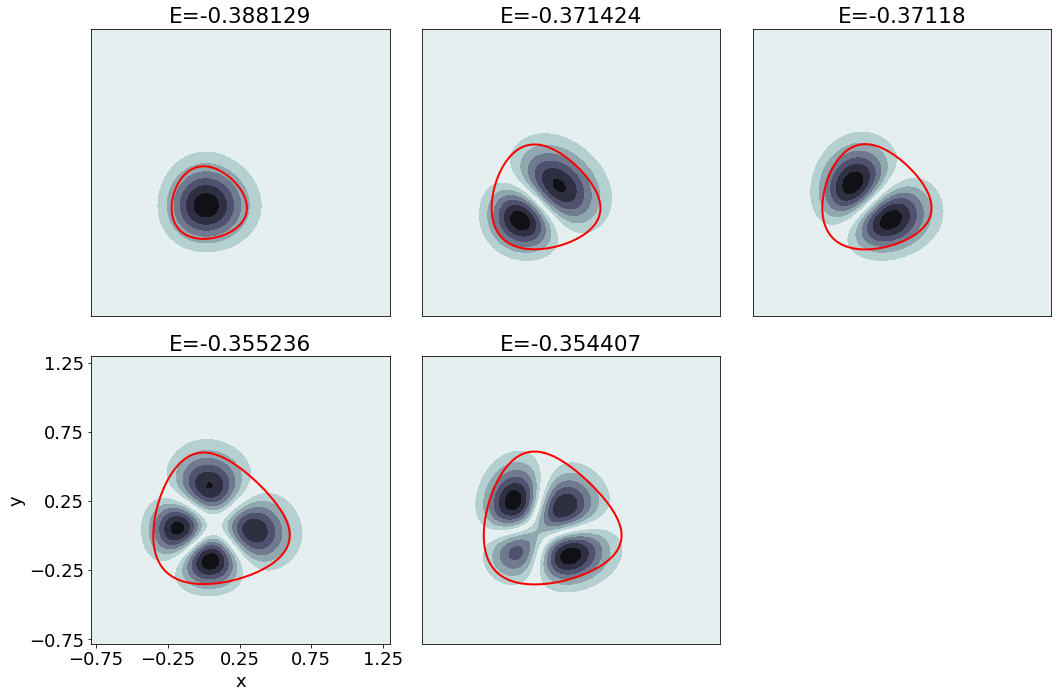

In [60]:
from skimage.measure import find_contours

row=2
col=3

plt.rcParams.update({'font.size': 18})
fig, ax = plt.subplots(row, col, figsize=(15,10))
h1 = (x[-1] - x[0])/x.shape[0]
h2 = (y[-1] - y[0])/y.shape[0]
for k in range(En.shape[0]):
    i = int(k/col)
    j = k%col
    C = 1/np.sqrt(np.sum(np.real(phi_n[k])*np.real(phi_n[k])*h1*h2))
    phi = phi_n[k].real**2 + phi_n[k].imag**2
    phi/=np.max(phi)
    #phi = C*np.real(phi_n[k])
    cmap_reversed = plt.cm.get_cmap('bone_r')   
    p = ax[i][j].contourf(x,y, np.sqrt(phi),cmap= cmap_reversed)
    #fig.colorbar(p, ax =ax[i][j])
    ax[i][j].set_title("E={}".format(round(En[k],6)))
    ax[i][j].set_xticks([])
    ax[i][j].set_yticks([])

    contours = find_contours(V , En[k])
    for contour in contours:
        Nx = x.shape[0]
        contour = dx*contour + xmin
        ax[i][j].plot(contour[:, 1], contour[:, 0], color='red', linewidth=2)

    
ax[1][2].remove()
ax[1,0].set_xlabel('x')
ax[1,0].set_ylabel('y')
ax[1][0].set_xticks([-0.75, -0.25, 0.25, 0.75, 1.25])
ax[1][0].set_yticks([-0.75, -0.25, 0.25, 0.75, 1.25])
plt.tight_layout(pad=1)
plt.savefig('figures/wavefunctions0.png', bbox_inches='tight')
plt.show()

## E=0.1

In [61]:
with open('results/eigenfunctions/phis_pred_morse08.npy', 'rb') as f:
            phi_n = np.load(f, allow_pickle=True)[:-1]
a = 2.175e8*0.528e-8
dx = 0.02
dy = 0.02
xmin=-0.9/a
xmax=1.5/a
ymin=-0.9/a
ymax=1.5/a
x = np.arange(xmin,xmax,dx)
y = np.arange(ymin,ymax,dy)
x_grid, y_grid = np.meshgrid(x,y)
V = De*(1-np.exp(-a*(x_grid - xe)))**2 + De*(1-np.exp(-a*(y_grid - xe)))**2 - 2*De
En = np.array([0.096895 , 0.098240  , 0.112796, 0.139761, 0.141801, 0.167319])- 2*De
En

array([-0.3086334, -0.3072884, -0.2927324, -0.2657674, -0.2637274,
       -0.2382094])

In [62]:
with open('results/eigenfunctions/phis_true_morse08.npy', 'rb') as f:
    phi_vari = np.load(f, allow_pickle=True)[:-1]
with open('results/eigenenergies/coupled_morse_eigenenergies1.npy', 'rb') as f:
    E_vari = np.load(f, allow_pickle=True)

In [63]:
print('MSE energies', np.square(En - E_vari[5:]))
print('Absolute error energies', np.abs(En - E_vari[5:]))

phi_vari_mod = phi_vari.real**2 + phi_vari.imag**2
phi_vari_mod/=np.max(phi_vari_mod, axis=(1,2)).reshape(-1,1,1)
phi_mod = phi_n.real**2 + phi_n.imag**2
phi_mod/=np.max(phi_mod, axis=(1,2)).reshape(-1,1,1)

print('MSE wavefunctions', np.mean(np.square(phi_vari_mod - phi_mod), axis=(1,2)))

MSE energies [8.29016015e-13 1.47486560e-11 6.14998109e-14 3.48723816e-13
 6.52181080e-11 3.62091265e-11]
Absolute error energies [9.10503166e-07 3.84039790e-06 2.47991554e-07 5.90528421e-07
 8.07577290e-06 6.01740197e-06]
MSE wavefunctions [6.55393057e-08 2.35337552e-09 8.02652983e-08 6.01018175e-06
 5.58659561e-07 9.76187890e-05]


In [64]:
from itertools import combinations
pairs = list(combinations(range(phi_n.shape[0]), 2))
for (n1,n2) in pairs:
    phi1 = phi_n[n1]
    phi1/=np.sqrt(np.sum(phi1*phi1.conj()*dx*dy))
    phi2 = phi_n[n2]
    phi2/=np.sqrt(np.sum(phi2*phi2.conj()*dx*dy))
    overlap = np.sum(phi1*phi2.conj()*dx*dy)
    overlap*=overlap.conj()
    overlap = overlap.real
    print('Overlap states n1={}, n2={}: {}'.format(n1,n2, overlap))

Overlap states n1=0, n2=1: 0.0004957794730574138
Overlap states n1=0, n2=2: 7.072677660674804e-06
Overlap states n1=0, n2=3: 1.871990305037289e-07
Overlap states n1=0, n2=4: 1.277659459739216e-06
Overlap states n1=0, n2=5: 3.024630125028992e-07
Overlap states n1=1, n2=2: 6.049155580530314e-06
Overlap states n1=1, n2=3: 1.5755735073022852e-06
Overlap states n1=1, n2=4: 7.010661083357996e-07
Overlap states n1=1, n2=5: 2.0273881117361407e-07
Overlap states n1=2, n2=3: 1.4609932888707843e-06
Overlap states n1=2, n2=4: 7.571300900576205e-07
Overlap states n1=2, n2=5: 3.3569653253533773e-07
Overlap states n1=3, n2=4: 0.0003879482412131213
Overlap states n1=3, n2=5: 1.0390574429185923e-06
Overlap states n1=4, n2=5: 2.2927633818344375e-07


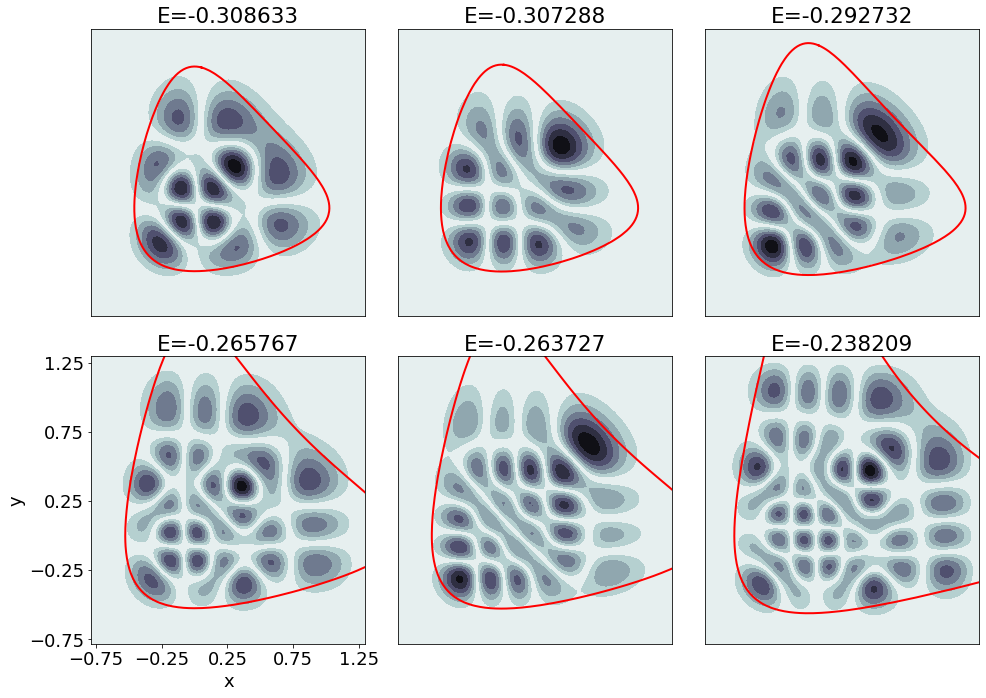

In [65]:
row=2
col=3
fig, ax = plt.subplots(row, col, figsize=(14,10))
h1 = (x[-1] - x[0])/x.shape[0]
h2 = (y[-1] - y[0])/y.shape[0]
phi_n = phi_vari
for k in range(En.shape[0]):
    i = int(k/col)
    j = k%col
    phi = phi_n[k].real**2 + phi_n[k].imag**2
    phi/=np.max(phi)
    p = ax[i][j].contourf(x,y, np.sqrt(phi),cmap= cmap_reversed)
    #fig.colorbar(p, ax =ax[i][j])
    ax[i][j].set_title("E={}".format(round(En[k],6)))
    ax[i][j].set_xticks([])
    ax[i][j].set_yticks([])

    contours = find_contours(V , En[k])
    for contour in contours:
        Nx = x.shape[0]
        contour = dx*contour + xmin
        ax[i][j].plot(contour[:, 1], contour[:, 0], color='red', linewidth=2)
    
ax[1,0].set_xlabel('x')
ax[1,0].set_ylabel('y')
ax[1][0].set_xticks([-0.75, -0.25, 0.25, 0.75, 1.25])
ax[1][0].set_yticks([-0.75, -0.25, 0.25, 0.75, 1.25])
plt.tight_layout(pad=1)
plt.savefig('figures/wavefunctions1.png', bbox_inches='tight')
plt.show()

## E=0.2

In [66]:
with open('results/eigenfunctions/phis_pred_morse156.npy', 'rb') as f:
            phi_n = np.load(f, allow_pickle=True)
a = 2.175e8*0.528e-8
dx = 0.015*2
dy = 0.015*2
xmin=-0.9/a
xmax=1.9/a
ymin=-0.9/a
ymax=1.9/a
x = np.arange(xmin,xmax,dx)
y = np.arange(ymin,ymax,dy)
x_grid, y_grid = np.meshgrid(x,y)
V = De*(1-np.exp(-a*(x_grid - xe)))**2 + De*(1-np.exp(-a*(y_grid - xe)))**2-2*De
En = np.array([0.154965, 0.169304, 0.183168, 0.193228, 0.20686 , 0.219696, 0.228534, 0.230682])-2*De
En

array([-0.2505634, -0.2362244, -0.2223604, -0.2123004, -0.1986684,
       -0.1858324, -0.1769944, -0.1748464])

In [67]:
with open('results/eigenfunctions/phis_true_morse156.npy', 'rb') as f:
    phi_vari = np.load(f, allow_pickle=True)
with open('results/eigenenergies/coupled_morse_eigenenergies2.npy', 'rb') as f:
    E_vari = np.load(f, allow_pickle=True)

In [68]:
print('MSE energies', np.square(En - E_vari))
print('Absolute error energies', np.abs(En - E_vari))

phi_vari_mod = phi_vari.real**2 + phi_vari.imag**2
phi_vari_mod/=np.max(phi_vari_mod, axis=(1,2)).reshape(-1,1,1)
phi_mod = phi_n.real**2 + phi_n.imag**2
phi_mod/=np.max(phi_mod, axis=(1,2)).reshape(-1,1,1)

print('MSE wavefunctions', np.mean(np.square(phi_vari_mod[:-1] - phi_mod[:-1]), axis=(1,2)))

MSE energies [1.02494914e-13 3.35410843e-11 2.67030327e-13 5.80580203e-09
 5.92818342e-09 5.94006147e-09 5.66355519e-07 1.58809236e-09]
Absolute error energies [3.20148269e-07 5.79146651e-06 5.16749773e-07 7.61958137e-05
 7.69946973e-05 7.70717943e-05 7.52565957e-04 3.98508765e-05]
MSE wavefunctions [1.58580525e-08 1.63292061e-08 4.86510262e-08 3.70249329e-07
 2.82825564e-07 2.73432675e-07 1.58238975e-05 6.31705296e-07]


In [69]:
from itertools import combinations
pairs = list(combinations(range(phi_n.shape[0]), 2))
for (n1,n2) in pairs:
    phi1 = phi_n[n1]
    phi1/=np.sqrt(np.sum(phi1*phi1.conj()*dx*dy))
    phi2 = phi_n[n2]
    phi2/=np.sqrt(np.sum(phi2*phi2.conj()*dx*dy))
    overlap = np.sum(phi1*phi2.conj()*dx*dy)
    overlap*=overlap.conj()
    overlap = overlap.real
    print('Overlap states n1={}, n2={}: {}'.format(n1,n2, overlap))

Overlap states n1=0, n2=1: 2.2479969961230222e-06
Overlap states n1=0, n2=2: 9.833715015850053e-06
Overlap states n1=0, n2=3: 7.308091605806674e-07
Overlap states n1=0, n2=4: 1.383403903147727e-06
Overlap states n1=0, n2=5: 1.5842044238314064e-07
Overlap states n1=0, n2=6: 4.228043243895364e-07
Overlap states n1=0, n2=7: 1.8397264330311744e-07
Overlap states n1=0, n2=8: 2.7032258917938687e-08
Overlap states n1=1, n2=2: 2.035147463134893e-05
Overlap states n1=1, n2=3: 2.463533047298444e-06
Overlap states n1=1, n2=4: 1.5294511368790577e-06
Overlap states n1=1, n2=5: 9.479612945333515e-08
Overlap states n1=1, n2=6: 3.692528420554915e-07
Overlap states n1=1, n2=7: 3.865516894653557e-08
Overlap states n1=1, n2=8: 2.3549196243363566e-07
Overlap states n1=2, n2=3: 4.159492859486606e-06
Overlap states n1=2, n2=4: 8.575821140917337e-06
Overlap states n1=2, n2=5: 1.4187286089370776e-07
Overlap states n1=2, n2=6: 5.7361220794462646e-06
Overlap states n1=2, n2=7: 2.249702932527106e-07
Overlap stat

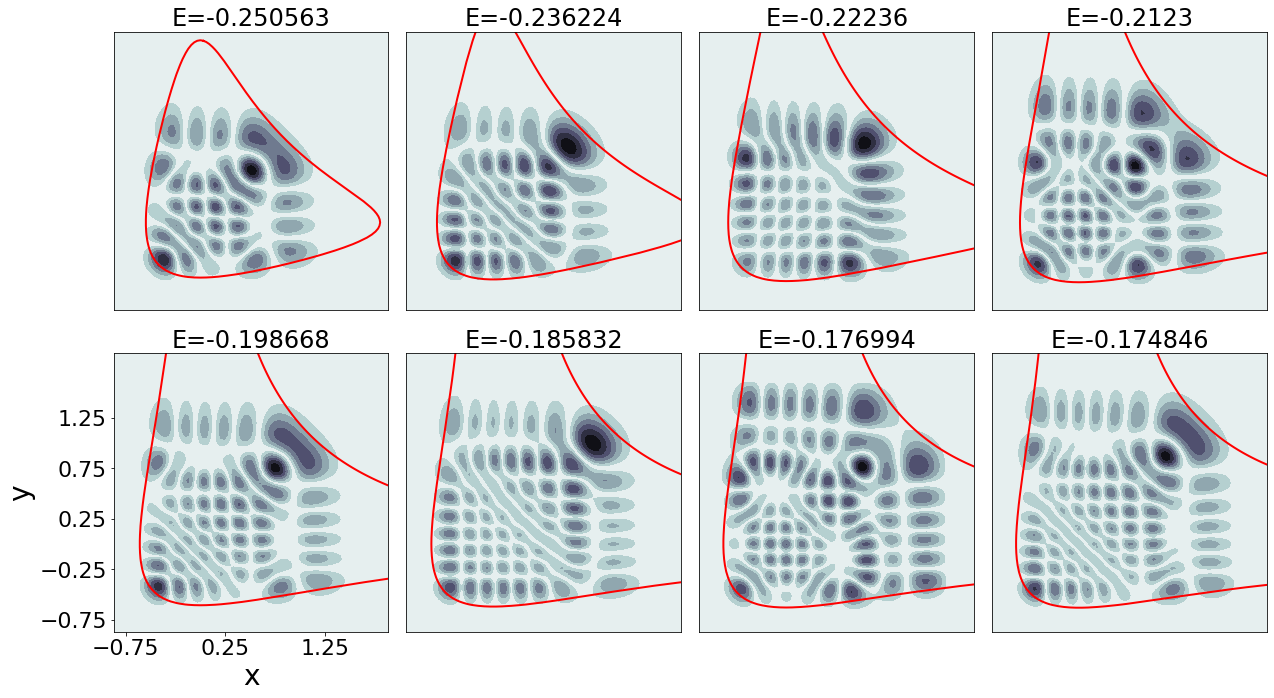

In [80]:
row=2
col=4
fig, ax = plt.subplots(row, col, figsize=(18,10))
h1 = (x[-1] - x[0])/x.shape[0]
h2 = (y[-1] - y[0])/y.shape[0]

xmin_large=-1.0/a
xmax_large=2.2/a
ymin_large=-1.0/a
ymax_large=2.2/a
x_large = np.arange(xmin_large, xmax_large, dx)
y_large = np.arange(ymin_large, ymax_large, dx)
dif_xmin = np.argsort(np.abs(x_large -x[0]))[0]
dif_xmax = np.argsort(np.abs(x_large -x[-1]))[0]

for k in range(En.shape[0]):
    i = int(k/col)
    j = k%col
    C = 1/np.sqrt(np.sum(np.real(phi_n[k])*np.real(phi_n[k])*h1*h2))
    phi = phi_n[k].real**2 + phi_n[k].imag**2
    phi/=np.max(phi)
    phi_large = np.zeros((x_large.shape[0], y_large.shape[0]))
    phi_large[dif_xmin-1:dif_xmax, dif_xmin-1:dif_xmax] = phi
    p = ax[i][j].contourf(x_large,y_large, np.sqrt(phi_large),cmap= cmap_reversed)
    #fig.colorbar(p, ax =ax[i][j])
    ax[i][j].set_title("E={}".format(round(En[k],6)), fontsize=24)
    ax[i][j].set_xticks([])
    ax[i][j].set_yticks([])

    x_grid, y_grid = np.meshgrid(x_large,y_large)
    V = De*(1-np.exp(-a*(x_grid - xe)))**2 + De*(1-np.exp(-a*(y_grid - xe)))**2 -2*De
    contours = find_contours(V , En[k])
    for contour in contours:
        Nx = x_large.shape[0]
        contour = dx*contour + xmin_large
        ax[i][j].plot(contour[:, 1], contour[:, 0], color='red', linewidth=2)
  

ax[1,0].set_xlabel('x', fontsize=28)
ax[1,0].set_ylabel('y', fontsize=28)

ax[1][0].set_xticks([-0.75,  0.25,  1.25])
ax[1][0].set_yticks([-0.75, -0.25, 0.25, 0.75, 1.25])    
ax[1][0].tick_params(axis='both', labelsize=22, which='major')
plt.tight_layout(pad=1)
plt.savefig('figures/wavefunctions2.png', bbox_inches='tight')
plt.show()

## E=0.3

In [59]:
with open('results/eigenfunctions/phis_pred_morse182.npy', 'rb') as f:
            phi_n = np.load(f, allow_pickle=True)
phi_n = phi_n[:-2]
a = 2.175e8*0.528e-8
dx = 0.015
dy = 0.015
xmin=-1.2/a
xmax=2.2/a
ymin=-1.2/a
ymax=2.2/a
x = np.arange(xmin,xmax,dx)
y = np.arange(ymin,ymax,dy)

En = np.array([0.230335, 0.249973, 0.252534, 0.271795, 0.273467, 0.29199 ,
       0.292543, 0.312326, 0.314245])-2*De
En

array([-0.1751934, -0.1555554, -0.1529944, -0.1337334, -0.1320614,
       -0.1135384, -0.1129854, -0.0932024, -0.0912834])

In [60]:
with open('results/eigenfunctions/phis_true_morse182.npy', 'rb') as f:
    phi_vari = np.load(f, allow_pickle=True)[:-2]
with open('results/eigenenergies/coupled_morse_eigenenergies3.npy', 'rb') as f:
    E_vari = np.load(f, allow_pickle=True)

In [61]:
print('MSE energies', np.square(En - E_vari))
print('Absolute error energies', np.abs(En - E_vari))

phi_vari_mod = phi_vari.real**2 + phi_vari.imag**2
phi_vari_mod/=np.max(phi_vari_mod, axis=(1,2)).reshape(-1,1,1)
phi_mod = phi_n.real**2 + phi_n.imag**2
phi_mod/=np.max(phi_mod, axis=(1,2)).reshape(-1,1,1)

print('MSE wavefunctions', np.mean(np.square(phi_vari_mod - phi_mod), axis=(1,2)))

MSE energies [9.43405840e-08 3.75990979e-11 8.59248012e-08 5.29915743e-08
 1.59504411e-09 4.31419142e-07 1.21488062e-08 5.26490429e-10
 9.27707889e-06]
Absolute error energies [3.07149123e-04 6.13181032e-06 2.93129325e-04 2.30198988e-04
 3.99380033e-05 6.56825047e-04 1.10221623e-04 2.29453793e-05
 3.04582975e-03]
MSE wavefunctions [3.60652934e-08 1.20404337e-05 1.98027713e-06 5.35628124e-06
 9.57605223e-07 3.76228984e-03 7.94654807e-03 2.08923992e-05
 1.91304171e-04]


In [62]:
from itertools import combinations
pairs = list(combinations(range(phi_n.shape[0]), 2))
for (n1,n2) in pairs:
    phi1 = phi_n[n1]
    phi1/=np.sqrt(np.sum(phi1*phi1.conj()*dx*dy))
    phi2 = phi_n[n2]
    phi2/=np.sqrt(np.sum(phi2*phi2.conj()*dx*dy))
    overlap = np.sum(phi1*phi2.conj()*dx*dy)
    overlap*=overlap.conj()
    overlap = overlap.real
    print('Overlap states n1={}, n2={}: {}'.format(n1,n2, overlap))

Overlap states n1=0, n2=1: 4.324617597406935e-06
Overlap states n1=0, n2=2: 1.1842370774738994e-06
Overlap states n1=0, n2=3: 3.843484967925377e-07
Overlap states n1=0, n2=4: 5.226764120588511e-07
Overlap states n1=0, n2=5: 2.66989687954839e-07
Overlap states n1=0, n2=6: 5.666060558975663e-07
Overlap states n1=0, n2=7: 3.184263057535793e-08
Overlap states n1=0, n2=8: 1.0933351440297196e-07
Overlap states n1=1, n2=2: 0.0002605631521935468
Overlap states n1=1, n2=3: 1.0253288074188154e-06
Overlap states n1=1, n2=4: 1.1488658437351005e-06
Overlap states n1=1, n2=5: 1.961279088474332e-08
Overlap states n1=1, n2=6: 2.2982587929332716e-07
Overlap states n1=1, n2=7: 1.1166613283076283e-06
Overlap states n1=1, n2=8: 3.368901464047881e-07
Overlap states n1=2, n2=3: 4.3815574786214865e-06
Overlap states n1=2, n2=4: 7.592713973527417e-07
Overlap states n1=2, n2=5: 1.7353588776545931e-06
Overlap states n1=2, n2=6: 9.260305903380232e-07
Overlap states n1=2, n2=7: 6.685350859745935e-08
Overlap state

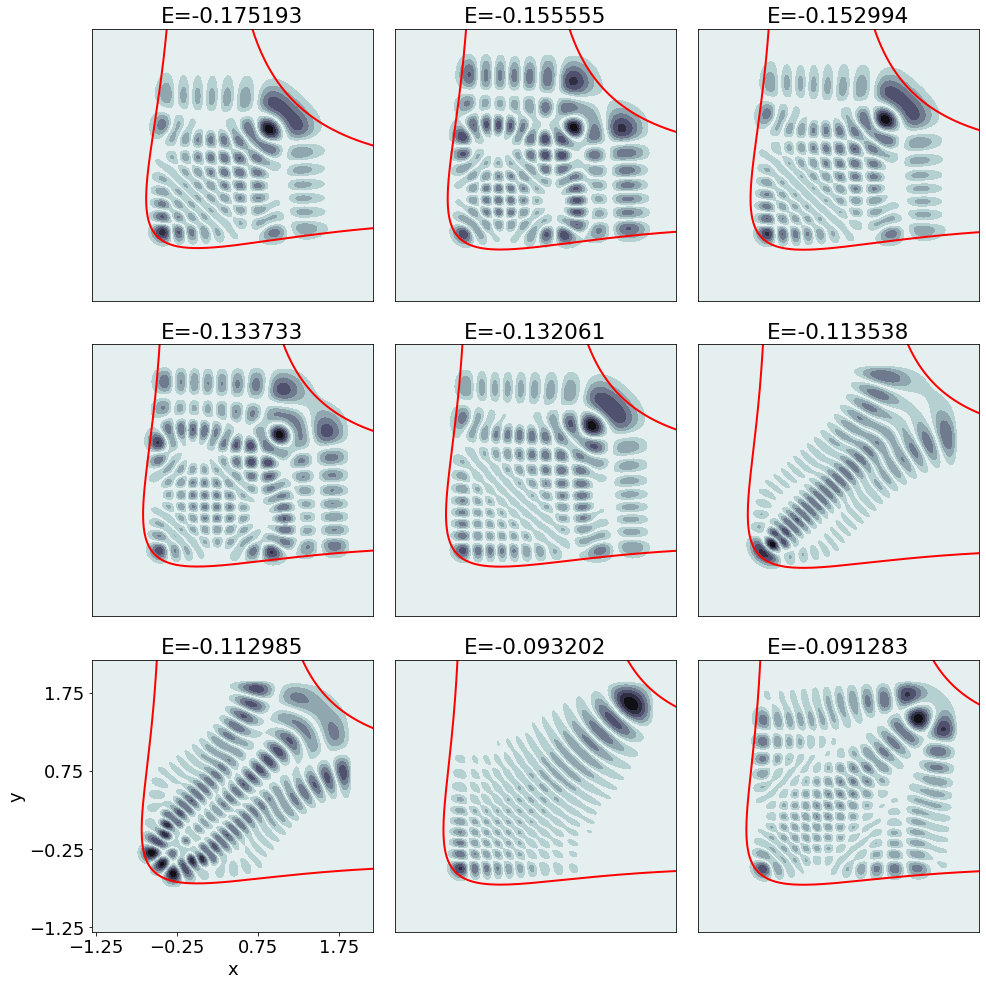

In [64]:
row=3
col=3
fig, ax = plt.subplots(row, col, figsize=(14,14))
h1 = (x[-1] - x[0])/x.shape[0]
h2 = (y[-1] - y[0])/y.shape[0]

# Extend wavefunctions to bigger region
xmin_large=-1.5/a
xmax_large=2.5/a
ymin_large=-1.5/a
ymax_large=2.5/a
x_large = np.arange(xmin_large, xmax_large, dx)
y_large = np.arange(ymin_large, ymax_large, dx)
dif_xmin = np.argsort(np.abs(x_large -x[0]))[0]
dif_xmax = np.argsort(np.abs(x_large -x[-1]))[0]

for k in range(En.shape[0]):
    i = int(k/col)
    j = k%col
    phi = phi_n[k].real**2 + phi_n[k].imag**2
    phi/=np.max(phi)
    phi_large = np.zeros((x_large.shape[0], y_large.shape[0]))
    phi_large[dif_xmin-1:dif_xmax, dif_xmin-1:dif_xmax] = phi
    p = ax[i][j].contourf(x_large,y_large, np.sqrt(phi_large),cmap= cmap_reversed)
    #fig.colorbar(p, ax =ax[i][j])
    ax[i][j].set_title("E={}".format(round(En[k],6)))
    ax[i][j].set_xticks([])
    ax[i][j].set_yticks([])

    x_grid, y_grid = np.meshgrid(x_large,y_large)
    V = De*(1-np.exp(-a*(x_grid - xe)))**2 + De*(1-np.exp(-a*(y_grid - xe)))**2-2*De
    contours = find_contours(V , En[k])
    for contour in contours:
        Nx = x_large.shape[0]
        contour = dx*contour + xmin_large
        ax[i][j].plot(contour[:, 1], contour[:, 0], color='red', linewidth=2)
  
ax[2,0].set_xlabel('x')
ax[2,0].set_ylabel('y')

ax[2][0].set_xticks([-1.25, -0.25,0.75,  1.75])
ax[2][0].set_yticks([-1.25,-0.25, 0.75,  1.75]) 
plt.tight_layout(pad=1)
plt.savefig('figures/wavefunctions3.png', bbox_inches='tight')
plt.show()